<a href="https://colab.research.google.com/github/johannes-kk/am207/blob/master/exercises/09_expectation_maximization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DAY 9: Expectation Maximization


### AM207: Advanced Scientific Computing

#### Instructor: Weiwei Pan

#### Due: October 1st, 11:59pm EST

**Names of Group Members**: Anna Li (annajli@g.harvard.edu), Minhuan Li, minhuanli@g.harvard.edu, Michael Butler: mbutler@g.harvard.edu, Yaoyang Lin (yaoyanglin@g.harvard.edu), Johannes Kolberg, johanneskolberg@g.harvard.edu

## Learning Goals:

1. Use latent variables for data augmentation
2. Derive the updates for the expectation maximization algorithm for a simple latent variable model


### Load necessary libraries

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from autograd import scipy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
%matplotlib inline

# Problem 1: Latent Variables for Data Augmentation

A botany research lab in Cambridge is exprimentally cross-breeding two types of hibiscus flowers: blue and pink. The goal is to study the genetic factor that creates an exotic flower whose petals are pink with a ring of blue on each. 

There are four types of child plant that can result from this cross-breeding: 

  - Type 1: blue petals
  - Type 2: pink petals 
  - Type 3: purple petals
  - Type 4: pink petals with a blue ring on each. 

Out of 197 initial cross-breedings, the nursery obtained the following counts of the four types of child plants:

$$Y = (y_1, y_2, y_3, y_4) = (125, 18, 20, 34)$$

where $y_i$ represents the number of child plants that are of type $i$.

The geneticist in the lab know that the probability of obtaining each type of child plant in any single breeding experiment is correlated by the inheritability $\theta$ of a specific genetic factor. That is, the probabilities of obtaining the four subtypes are as follows:

$$ \frac{\theta+2}{4}, \frac{1-\theta}{4}, \frac{1-\theta}{4}, \frac{\theta}{4},$$

where $\theta \in [0, 1]$ is unknown.

The lab chose to model the observed data using a multinomial model:

\begin{align}
Y & \sim Mult\left(197, \left[\frac{\theta+2}{4}, \frac{1 - \theta}{4}, \frac{1 - \theta}{4}, \frac{\theta}{4} \right]\right)
\end{align}

The aim of this problem is to estimate $\theta$ from the observed counts.

In models where directly computing the MLE is hard (you can think about if that is the case here!), the optimization of the likelihood can often be simplified by introducing a latent variable into the model and then optimize the liklelihood using EM - this process is called ***data augmentation***.

The nursery augmented the data with a new variable $Z$ such that:
$$Z + (y_1 - Z) = y_1.$$
That is, using $Z$, they are breaking $y_1$, the number of Type I child plants, into two subtypes, with $Z$ being the count of Subtype #1 and $(y_1-Z)$ being the count of Subtype #2. The lab posited the probability of obtain the two subtype $\theta/4$ and $1/2$, respectively.

The augmented model (which includes the observed data $y$ and the latent variable $z$ they introduced) they derived is as follows:

\begin{aligned}
Z | Y, \theta &\sim Bin\left(y_1, \frac{\theta}{2 + \theta}\right)\\
Y & \sim Mult\left(197, \left[\frac{1}{2} + \frac{\theta}{4}, \frac{1 - \theta}{4}, \frac{1 - \theta}{4}, \frac{\theta}{4} \right]\right)
\end{aligned}

**Exercise 1:** Show that the assumptions the lab made about $Z$ implies that $Z | Y, \theta \sim Bin\left(y_1, \frac{\theta}{2 + \theta}\right)$.

For each flower observed of Type 1, our assumption says that the flower will fall into subtype 1 with probability $\frac{\theta}{4}$ and subtype 2 with probability $\frac{1}{2}$ given the premise. Notice the probability of getting Type 1 is $\frac{\theta + 2}{4}$. So the probability that one flower is being of subtype 1 is the probability that given a flower of type 1, we are a flower of subtype 1 over the probability of being a flower of type 1, using conditional probabilities, we know that $P(Z = subtype_1| Y = y_1, \theta) = \frac{P(y_1, Z)}{P(y_1)} = \frac{\theta/4}{(\theta + 2)/4} = \frac{\theta}{\theta + 2}.$

By the law of total probability, $P(Z = subtype_1 | Y, \theta) = P(Z = subtype_1 | y_1, \theta) + P(Z = subtype_1 | y_2, \theta) + ... + P(Z = subtype_1 | y_4, \theta) = P(Z = subtype_1 | y_1, \theta) = \frac{\theta}{\theta + 2}$

Since there are $y_1$ number of flowers observed of Type 1, we can clearly see that our distribution $P(Z | Y , \theta)$ is a Binomial distribution with the probability of getting subtype 1 is $\frac{\theta}{\theta + 2}$ over $y_1$ observations. So $Z | Y, \theta \sim Bin\left(y_1, \frac{\theta}{2 + \theta}\right)$.

**Exercise 2:** Derive the EM updates for the augmented latent variable model.

**E-step:** $q_{new}(Z_n) = argmax_q ELBO(\theta_{old}, q) = p(Z_n|Y_n, \theta_old) = \frac{\theta_{old}}{\theta_{old} + 2}$ (updating distribution)

**M-step:** $\theta_{new} = argmax_{\theta} ELBO(\theta, q_{new}) = argmax_{\theta}  \mathbb{E}_{Z}\log[\frac{(p(Y, Z|\theta)}{q(Z)}].$ Where $Z$ is drawn from $q(Z) = p(Z_n|Y_n, \theta_{old})$. 

Notice that when we break up the log and expectation, $\theta_{new} = argmax_{\theta} ELBO(\theta, q_{new}) = argmax_{\theta}  \mathbb{E}_{Z}[\log(p(Y, Z|\theta)] - \mathbb{E}_{Z}[\log q(Z)]$. Since the second expectation term does not depend on $\theta$ and is a term lowering the overall value of the argmax, =>  $$\theta_{new} = argmax_{\theta}  \mathbb{E}_{Z}[\log(p(Y, Z|\theta)]$$

Using Bayes' Rule, $p(Y, Z | \theta) = p(Z|Y, \theta) * p(Y)$ =>

$p(Y, Z | \theta) = p(Z|y_1, \theta) * p(y_1)$, since again by the law of total probability, the other probability terms will go to 0. 

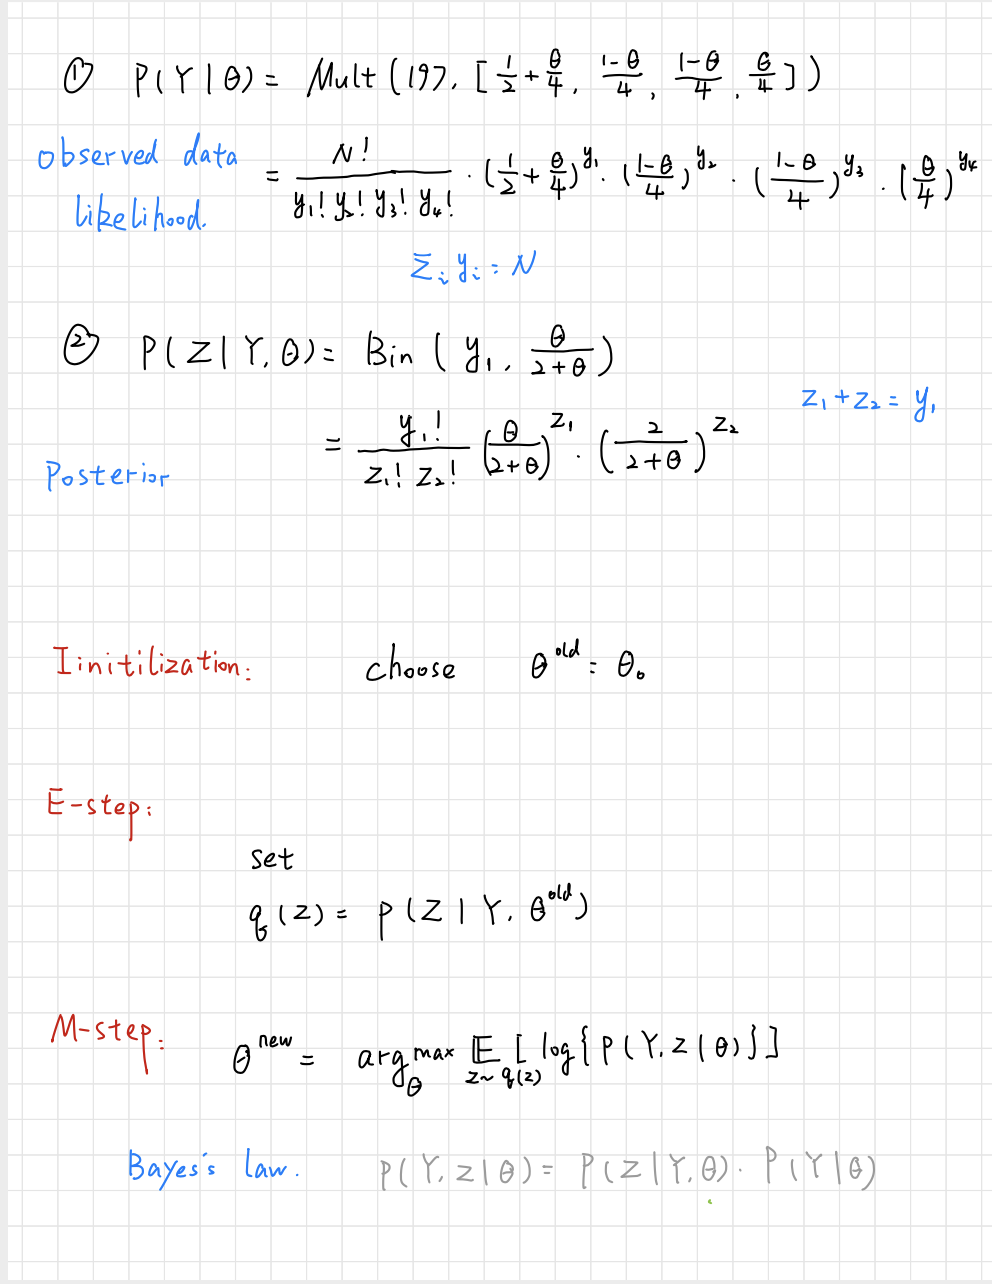

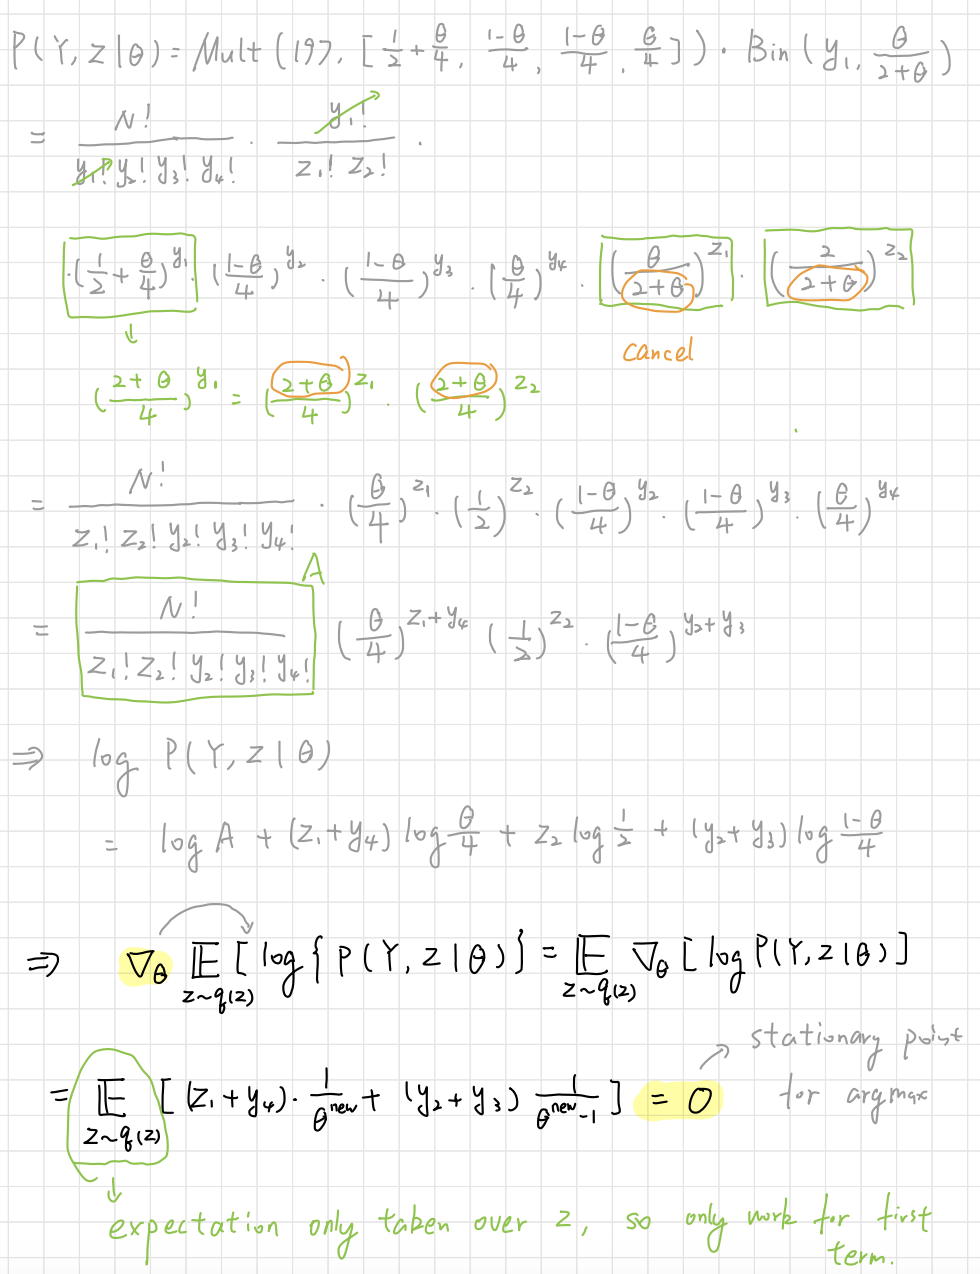

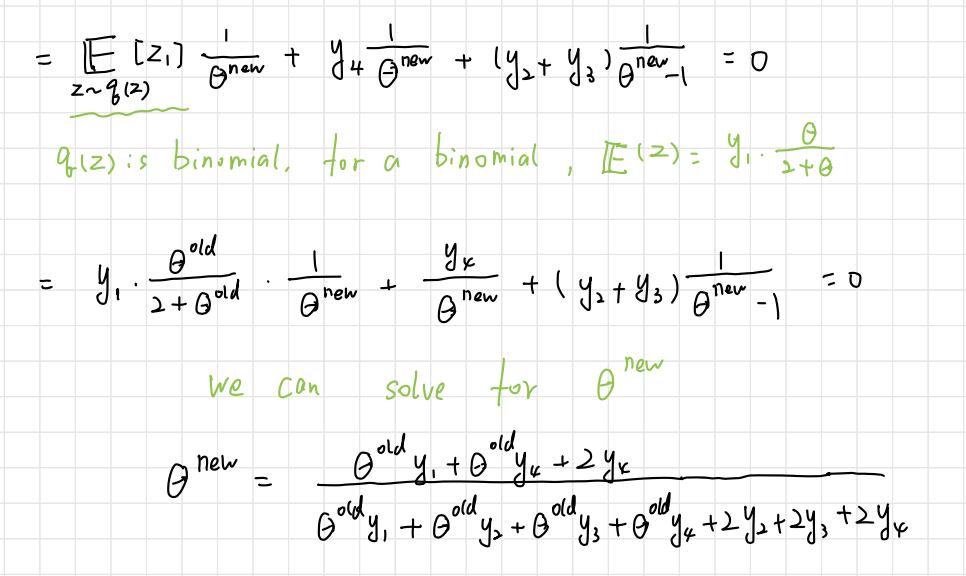

**Exercise 3:** Explain the potential advantage of augmenting likelihood models with a latent variable (e.g. what aspects of the MLE computation becomes easier or more efficient?).